**Опис набору даних https://www.kaggle.com/competitions/bike-sharing-demand/data**
Надаються дані про погодинну оренду за два роки. Навчальний набір складається з перших 19 днів кожного місяця, тоді як тестовий набір – з 20 числа до кінця місяця. Потрібно передбачити загальну кількість орендованих велосипедів протягом кожної години, охопленої тестовим набором, використовуючи лише інформацію, доступну до періоду оренди.

Поля даних:
* datetime - погодинна дата + мітка часу  
* season - 1 = весна, 2 = літо, 3 = осінь, 4 = зима 
* holiday - чи вважається день святковим
* workingday - чи день не є ані вихідним, ані святковим
* weather - 1: ясно, мало хмарно, мінлива хмарність
          2: туман + хмарність, туман + розривчасті хмари, туман + кілька хмар, туман
          3: легкий сніг, легкий дощ + гроза + окремі хмари, легкий дощ + окремі хмари
          4: сильний дощ + ожеледиця + Гроза + туман, сніг + туман 
* temp - температура в градусах Цельсія
* atemp - "відчувається" температура в градусах Цельсія
* humidity - відносна вологість
* windspeed - швидкість вітру
* casual - кількість ініційованих прокатів незареєстрованими користувачами
* registered - кількість ініційованих прокатів зареєстрованими користувачами
* count - загальна кількість прокатів

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [4]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


**Робота із datetime**

In [5]:
df['date'] = df.datetime.apply(lambda x : x.split()[0])
df['hour'] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df['weekday'] = df.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())

# test data
df_test['date'] = df_test.datetime.apply(lambda x : x.split()[0])
df_test['hour'] = df_test.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_test['weekday'] = df_test.date.apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())

In [6]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,2


# Візуалізація залежності

**Залежність від пори року**

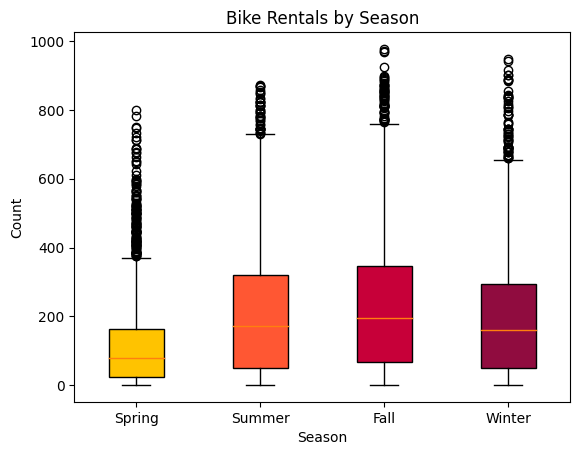

In [7]:
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
season_counts = [df[df['season']==1]['count'], 
                 df[df['season']==2]['count'], 
                 df[df['season']==3]['count'], 
                 df[df['season']==4]['count']]

colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F']  # Палітра кольорів

boxplot = plt.boxplot(season_counts, patch_artist=True, labels=season_labels)

# Застосування кольорів до boxplot
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Bike Rentals by Season')
plt.show()

Весняний сезон має відносно нижчу кількість оренд. Падіння медіанного значення на коробковій діаграмі свідчить про це. Найбільша кількість оренд восени. 

****Залежність від holiday і workingday****
* holiday - чи вважається день святковим
* workingday - чи день не є ані вихідним, ані святковим

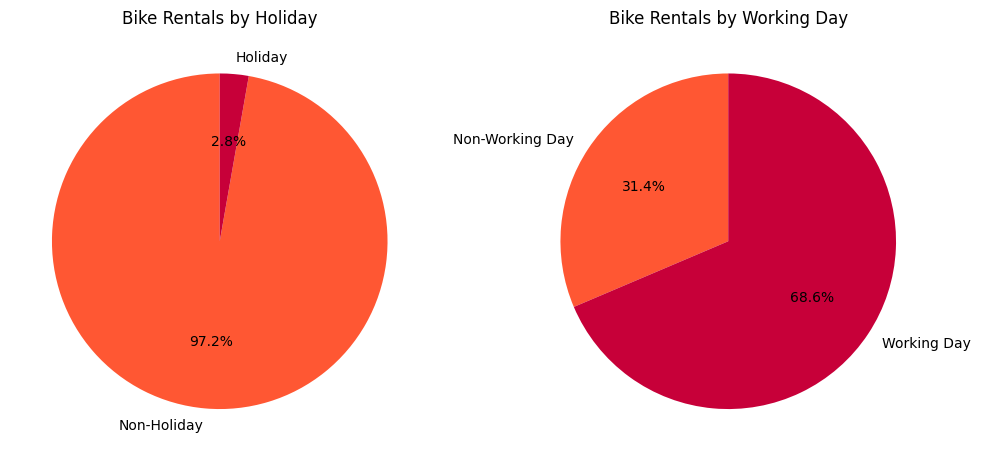

In [8]:
holiday_counts = df.groupby('holiday')['count'].sum()
holiday_labels = ['Non-Holiday', 'Holiday']
holiday_colors = ['#FF5733', '#C70039']

workingday_counts = df.groupby('workingday')['count'].sum()
workingday_labels = ['Non-Working Day', 'Working Day']
workingday_colors = ['#FF5733', '#C70039']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(holiday_counts, labels=holiday_labels, colors=holiday_colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Bike Rentals by Holiday')

axes[1].pie(workingday_counts, labels=workingday_labels, colors=workingday_colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Bike Rentals by Working Day')

plt.tight_layout()
plt.show()

Більший показник оренд в робочі та несвяткові дні

****Залежність від temp і atemp****
* temp - температура в градусах Цельсія
* atemp - "відчувається" температура в градусах Цельсія

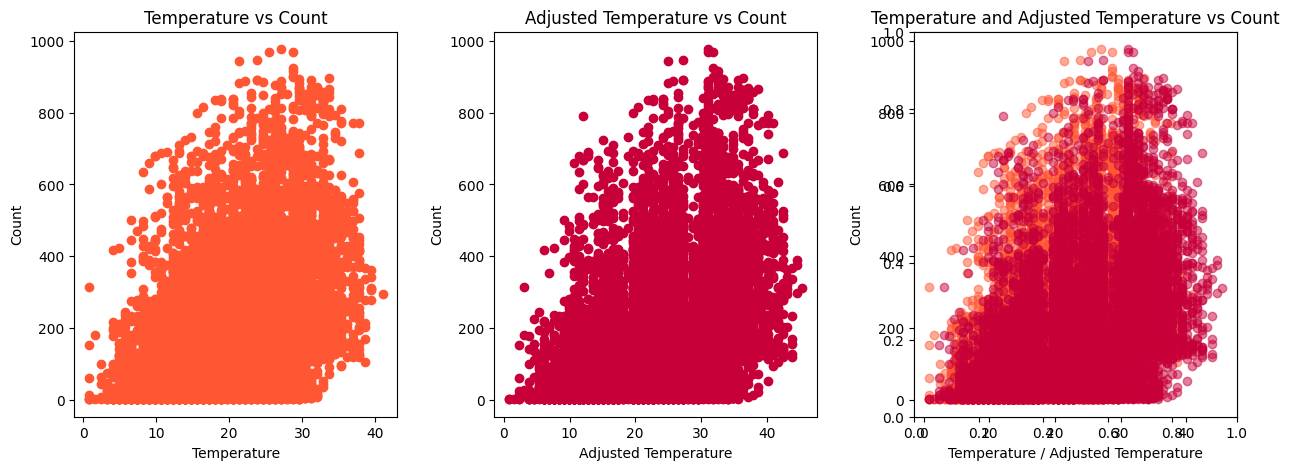

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['temp'], df['count'], color='#FF5733')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Count')
axes[0].set_title('Temperature vs Count')

axes[1].scatter(df['atemp'], df['count'], color='#C70039')
axes[1].set_xlabel('Adjusted Temperature')
axes[1].set_ylabel('Count')
axes[1].set_title('Adjusted Temperature vs Count')

ax3 = fig.add_subplot(133)
ax3.scatter(df['temp'], df['count'], color='#FF5733', alpha=0.5)
ax3.scatter(df['atemp'], df['count'], color='#C70039', alpha=0.5)
ax3.set_xlabel('Temperature / Adjusted Temperature')
ax3.set_ylabel('Count')
ax3.set_title('Temperature and Adjusted Temperature vs Count')

plt.subplots_adjust(wspace=0.3)

plt.show()

Показники майже однакові, тому є сенс один з параметрів виключити з аналізу

****Залежність від weather****
* 1: ясно, мало хмарно, мінлива хмарність
* 2: туман + хмарність, туман + розривчасті хмари, туман + кілька хмар, туман
* 3: легкий сніг, легкий дощ + гроза + окремі хмари, легкий дощ + окремі хмари
* 4: сильний дощ + ожеледиця + гроза + туман, сніг + туман 

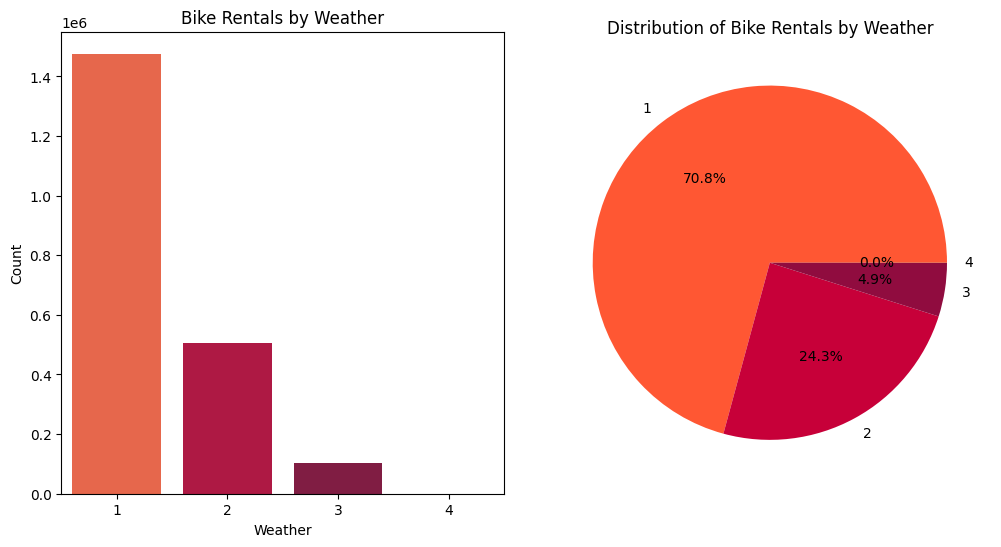

In [10]:
weather_counts = df.groupby('weather')['count'].sum().reset_index()

colors = ['#FF5733', '#C70039', '#900C3F', '#FFC300']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='weather', y='count', data=weather_counts, palette=colors, ax=axes[0])
axes[0].set_xlabel('Weather')
axes[0].set_ylabel('Count')
axes[0].set_title('Bike Rentals by Weather')

axes[1].pie(weather_counts['count'], labels=weather_counts['weather'], colors=colors, autopct='%1.1f%%')
axes[1].set_title('Distribution of Bike Rentals by Weather')

plt.subplots_adjust(wspace=0.1)

plt.show()


Чим краща погода, тим більше оренд

**Залежність від humidity і windspeed**
* humidity - відносна вологість
* windspeed - швидкість вітру

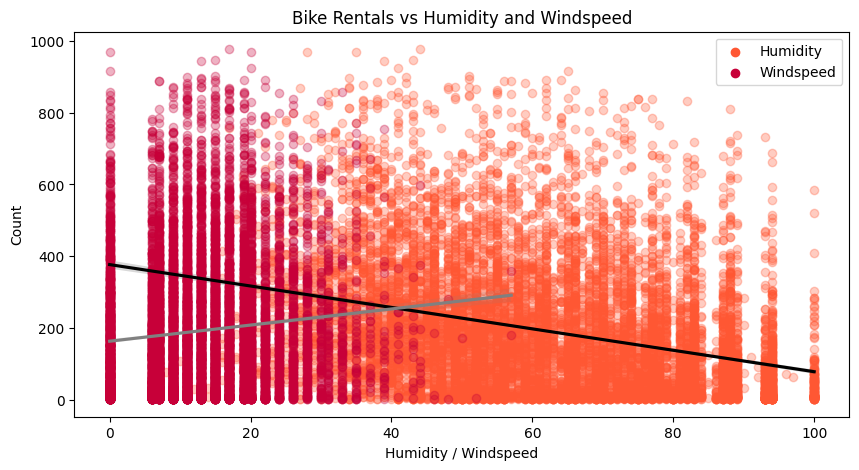

In [11]:
plt.figure(figsize=(10, 5))

sns.regplot(x='humidity', y='count', data=df, scatter_kws={'alpha': 0.3, 'color': '#FF5733'},
            line_kws={'color': 'black'})

sns.regplot(x='windspeed', y='count', data=df, scatter_kws={'alpha': 0.3, 'color': '#C70039'},
            line_kws={'color': 'grey'})

plt.scatter([], [], color='#FF5733', label='Humidity')
plt.scatter([], [], color='#C70039', label='Windspeed')

plt.xlabel('Humidity / Windspeed')
plt.ylabel('Count')
plt.title('Bike Rentals vs Humidity and Windspeed')

plt.legend()
plt.show()


Чим вища відносна вологість, тим менше оренд, чим вища швидкість вітру, тим більше оренд

**Залежність від hour**

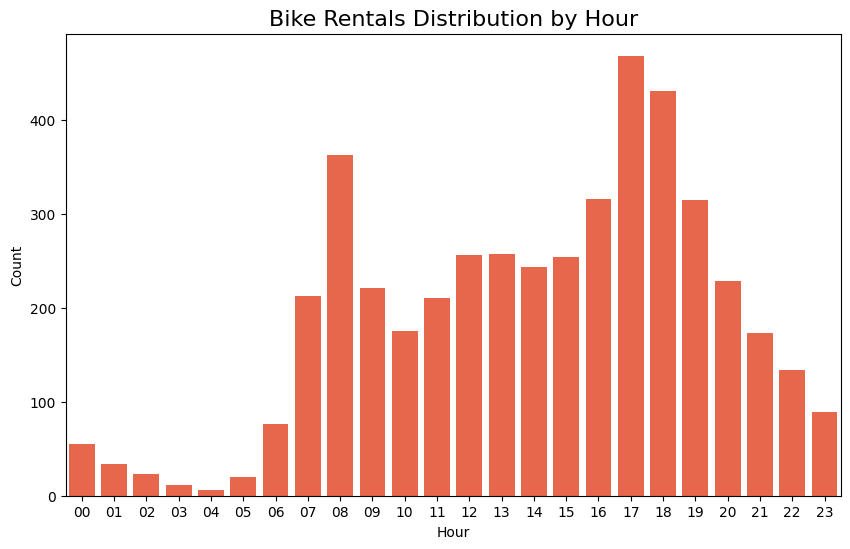

In [12]:
hourly_counts = df.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=hourly_counts, color='#FF5733')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Bike Rentals Distribution by Hour', fontsize=16)
plt.show()

Погодинний розподіл досить цікавий. Середнє значення є відносно вищим із 8:00 до 9:00 та з 17:00 до 18:00. Можливо це пов'язано з орендою для маршруту до роботи чи школи.

**Залежність від weekday**

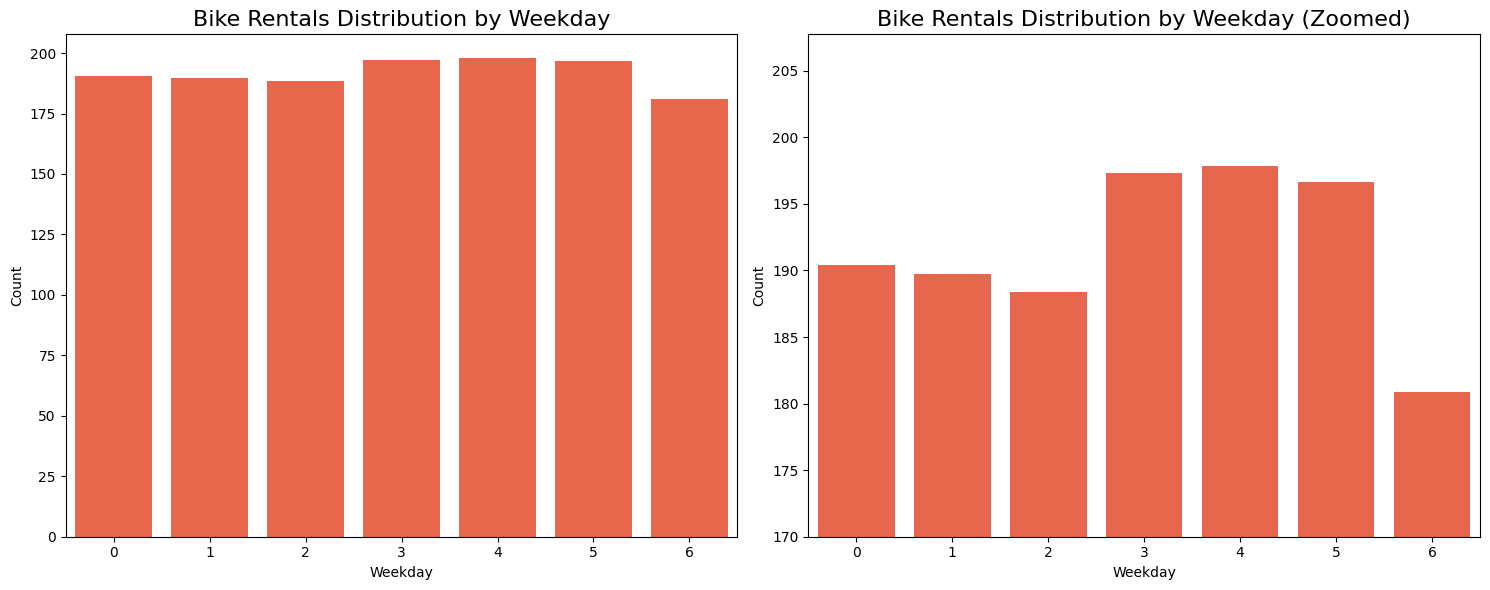

In [13]:
weekday_counts = df.groupby('weekday')['count'].mean().reset_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='weekday', y='count', data=weekday_counts, color='#FF5733')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Bike Rentals Distribution by Weekday', fontsize=16)

plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='count', data=weekday_counts, color='#FF5733')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Bike Rentals Distribution by Weekday (Zoomed)', fontsize=16)
plt.ylim(170, None)

plt.tight_layout()
plt.show()


Найвищі показники оренди в четвер, п'ятницю та суботу

**Залежність від month**

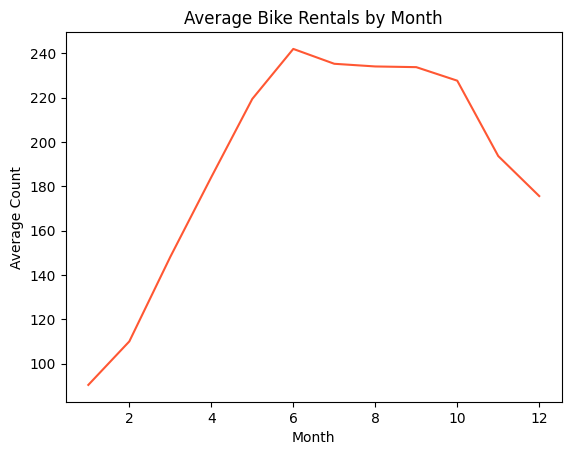

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

monthly_count = df.groupby('month')['count'].mean()

plt.plot(monthly_count.index, monthly_count.values, color='#FF5733')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Average Bike Rentals by Month')
plt.show()

Влітку та восени найвищі показники

In [15]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,2,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20,2,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,2,12


# Кореляційний аналіз

<Axes: >

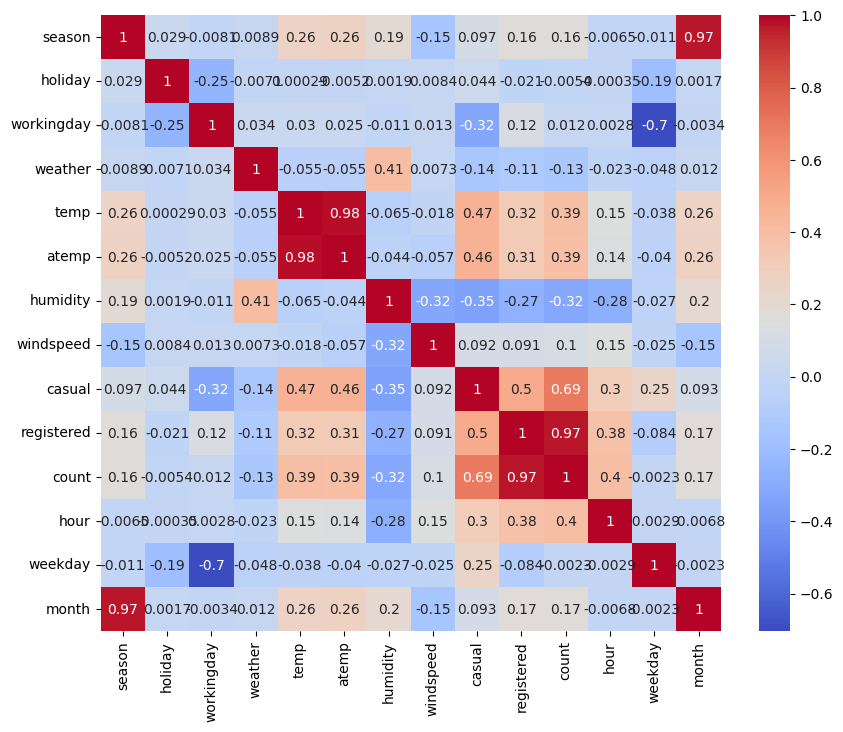

In [16]:
correlation_matrix = df.drop(['date', 'datetime'],axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='humidity', ylabel='count'>

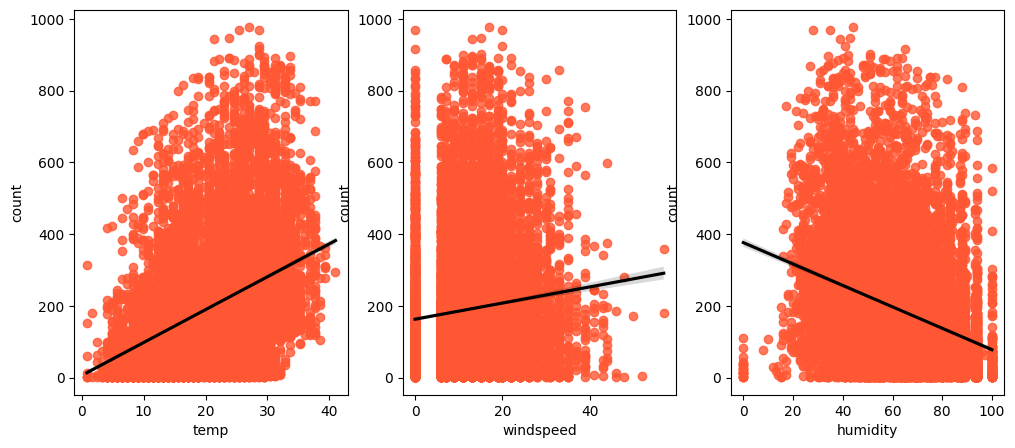

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1, color='#FF5733', line_kws={'color':'black'})
sns.regplot(x="windspeed", y="count", data=df,ax=ax2, color='#FF5733', line_kws={'color':'black'})
sns.regplot(x="humidity", y="count", data=df,ax=ax3, color='#FF5733', line_kws={'color':'black'})

* Відповідно до аналізу, необхідно виключити колонки "casual", "registered", оскільки їх сума і так вказана в "count". 
* Характеристики температури та вологості мають позитивну та негативну кореляцію з підрахунком відповідно. Хоча кореляція між ними не дуже помітна, все ж змінна count мало залежить від «температури» та «вологості».
* Швидкість вітру не буде дійсно корисною числовою характеристикою, і це видно з її значення кореляції з "count". 
* "atemp" є змінною, яка не береться до уваги, оскільки "atemp" і "temp" мають сильну кореляцію одне з одним. Під час побудови моделі будь-яка зі змінних має бути відкинута, оскільки вони демонструватимуть мультиколінеарність даних.

C:\Users\shvor\AppData\Local\Temp\ipykernel_29152\593539890.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["count"],ax=axes[0][0], color='#FF5733')
C:\Users\shvor\AppData\Local\Temp\ipykernel_29152\593539890.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["count"]),ax=axes[

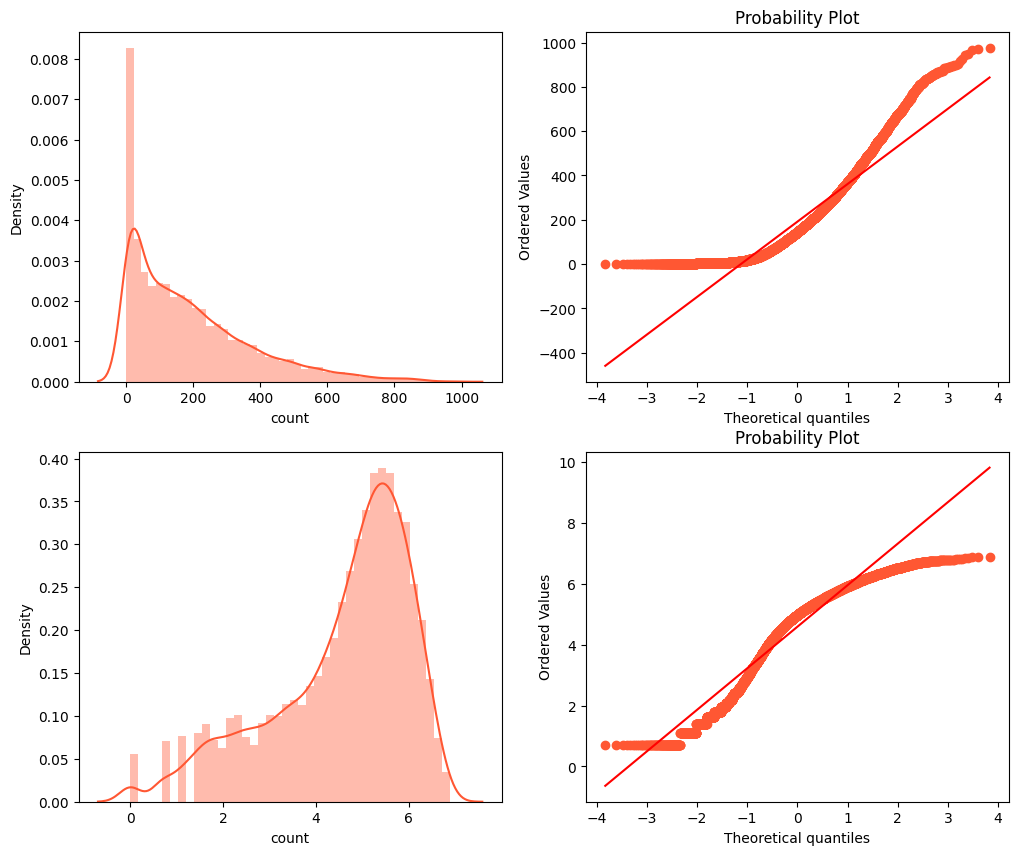

In [18]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(df["count"],ax=axes[0][0], color='#FF5733')
stats.probplot(df["count"], dist='norm', fit=True, plot=axes[0, 1])
axes[0, 1].get_lines()[0].set_color('#FF5733')
sns.distplot(np.log(df["count"]),ax=axes[1][0], color='#FF5733')
stats.probplot(np.log1p(df["count"]), dist='norm', fit=True, plot=axes[1, 1])
axes[1, 1].get_lines()[0].set_color('#FF5733')

In [19]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,2,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20,2,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,2,12


In [20]:
df = df.drop(['date', 'datetime', 'atemp', 'casual','registered', 'month'],axis=1)

In [21]:
df_test = df_test.drop(['date', 'datetime', 'atemp'],axis=1)

In [22]:
df

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
0,1,0,0,1,9.84,81,0.0000,16,00,5
1,1,0,0,1,9.02,80,0.0000,40,01,5
2,1,0,0,1,9.02,80,0.0000,32,02,5
3,1,0,0,1,9.84,75,0.0000,13,03,5
4,1,0,0,1,9.84,75,0.0000,1,04,5
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,336,19,2
10882,4,0,1,1,14.76,57,15.0013,241,20,2
10883,4,0,1,1,13.94,61,15.0013,168,21,2
10884,4,0,1,1,13.94,61,6.0032,129,22,2


# Об'єднуємо датасети трейн і тест

In [23]:
data = pd.concat([df, df_test], ignore_index=True)

In [24]:
data

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
0,1,0,0,1,9.84,81,0.0000,16.0,00,5
1,1,0,0,1,9.02,80,0.0000,40.0,01,5
2,1,0,0,1,9.02,80,0.0000,32.0,02,5
3,1,0,0,1,9.84,75,0.0000,13.0,03,5
4,1,0,0,1,9.84,75,0.0000,1.0,04,5
...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,2,10.66,60,11.0014,NaN,19,0
17375,1,0,1,2,10.66,60,11.0014,NaN,20,0
17376,1,0,1,1,10.66,60,11.0014,NaN,21,0
17377,1,0,1,1,10.66,56,8.9981,NaN,22,0


# Застосування машинного навчання для прогнозування порожніх значень windspeed

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# Розділити дані на навчальну та тестову вибірки
X_train = df[['season','weather','temp','humidity','hour']]
y_train = df['windspeed']
X_test = df_test[['season','weather','temp','humidity','hour']]
y_test = df_test['windspeed']

# Визначити моделі
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    Ridge()
]

best_model = None
best_mse = float('inf')

# Застосувати перехресну перевірку для кожної моделі та вибрати найкращу
for model in models:
    scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = scores.mean()
    
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_model = model

# Підганяти найкращу модель на всій навчальній вибірці
best_model.fit(X_train, y_train)

# Оцінити модель на тестовій вибірці
mse = mean_squared_error(y_test, best_model.predict(X_test))

In [26]:
best_model

GradientBoostingRegressor()

In [27]:
mse

59.46875557015492

In [28]:
windspeed0 = data[data['windspeed']==0]
windspeedNot0 = data[data['windspeed']!=0]

Model_windspeed = GradientBoostingRegressor()

windspeedColumns = ['season','weather','temp','humidity','hour']
Model_windspeed.fit(windspeedNot0[windspeedColumns], windspeedNot0['windspeed'])

windspeed0Values = Model_windspeed.predict(X= windspeed0[windspeedColumns])
windspeed0['windspeed'] = windspeed0Values
data = pd.concat([windspeedNot0, windspeed0])
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Users\shvor\AppData\Local\Temp\ipykernel_29152\2296458169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed0['windspeed'] = windspeed0Values


In [29]:
data

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
0,1,0,0,2,9.84,75,6.003200,1.0,05,5
1,1,0,0,1,15.58,76,16.997900,36.0,10,5
2,1,0,0,1,14.76,81,19.001200,56.0,11,5
3,1,0,0,1,17.22,77,19.001200,84.0,12,5
4,1,0,0,2,18.86,72,19.999500,94.0,13,5
...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0,3,8.20,100,14.139577,NaN,12,5
17375,1,0,0,3,8.20,100,14.139577,NaN,13,5
17376,1,0,0,2,9.84,87,13.287630,NaN,15,5
17377,1,0,0,2,10.66,60,13.930025,NaN,23,5


# Застосування машинного навчання для прогнозування count для тестового набору 

In [30]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [31]:
dataTrain = data[pd.notnull(data['count'])]
dataTest = data[~pd.notnull(data['count'])]

In [32]:
X_train = dataTrain.drop('count', axis=1)
X_test = dataTest.drop('count', axis=1)
y_train = np.log1p(dataTrain['count'])
y_test = np.log1p(dataTest['count'])

In [33]:
dataTrain

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
0,1,0,0,2,9.84,75,6.003200,1.0,05,5
1,1,0,0,1,15.58,76,16.997900,36.0,10,5
2,1,0,0,1,14.76,81,19.001200,56.0,11,5
3,1,0,0,1,17.22,77,19.001200,84.0,12,5
4,1,0,0,2,18.86,72,19.999500,94.0,13,5
...,...,...,...,...,...,...,...,...,...,...
16507,4,0,1,2,16.40,87,12.889038,232.0,12,0
16508,4,0,1,2,17.22,88,12.806043,211.0,15,0
16509,4,0,1,1,15.58,94,10.007348,662.0,08,1
16510,4,0,1,1,13.94,49,14.889040,132.0,22,1


In [34]:
dataTest

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
9573,1,0,1,1,10.66,56,26.002700,NaN,00,3
9574,1,0,1,1,10.66,56,11.001400,NaN,03,3
9575,1,0,1,1,10.66,56,11.001400,NaN,04,3
9576,1,0,1,1,9.84,60,15.001300,NaN,05,3
9577,1,0,1,1,9.02,60,15.001300,NaN,06,3
...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0,3,8.20,100,14.139577,NaN,12,5
17375,1,0,0,3,8.20,100,14.139577,NaN,13,5
17376,1,0,0,2,9.84,87,13.287630,NaN,15,5
17377,1,0,0,2,10.66,60,13.930025,NaN,23,5


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Навчання моделей
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X = X_train,y = y_train)

RidgeModel = Ridge(alpha=10)
RidgeModel.fit(X = X_train,y = y_train)

LassoModel = Lasso()
LassoModel.fit(X = X_train,y = y_train)

# Дерево рішень
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Випадковий ліс
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Градієнтний бустінг
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Make predictions
predsLinear = LinearRegressionModel.predict(X_test)
predsRidge = RidgeModel.predict(X_test)
predsLasso = LassoModel.predict(X_test)
preds_decision_tree = decision_tree.predict(X_test)
preds_random_forest = random_forest.predict(X_test)
preds_gradient_boosting = gradient_boosting.predict(X_test)

print('-----------------------------------------------')
print('Model: LinearRegression')
predsLinear = np.round(np.exp(predsLinear))
print("RMSLE: ", rmsle(np.exp(y_test), predsLinear, convertExp=False))
print("R^2: ", LinearRegressionModel.score(X_train, y_train))

print('-----------------------------------------------')
print('Model: RidgeRegression')
predsRidge = np.round(np.exp(predsRidge))
print("RMSLE: ", rmsle(np.exp(y_test), predsRidge, convertExp=False))
print("R^2: ", RidgeModel.score(X_train, y_train))

print('-----------------------------------------------')
print('Model: LassoRegression')
predsLasso = np.round(np.exp(predsLasso))
print("RMSLE: ", rmsle(np.exp(y_test), predsLasso, convertExp=False))
print("R^2: ", LassoModel.score(X_train, y_train))

print('-----------------------------------------------')
print('Model: Decision tree')
preds_decision_tree = np.round(np.exp(preds_decision_tree))
print("RMSLE: ", rmsle(np.exp(y_test), preds_decision_tree, convertExp=False))
print("R^2: ", decision_tree.score(X_train, y_train))

print('-----------------------------------------------')
print('Model: Random forest')
preds_random_forest = np.round(np.exp(preds_random_forest))
print("RMSLE: ", rmsle(np.exp(y_test), preds_random_forest, convertExp=False))
print("R^2: ", random_forest.score(X_train, y_train))

print('-----------------------------------------------')
print('Model: Gradient boosting')
preds_gradient_boosting = np.round(np.exp(preds_gradient_boosting))
print("RMSLE: ", rmsle(np.exp(y_test), preds_gradient_boosting, convertExp=False))
print("R^2: ", gradient_boosting.score(X_train, y_train))

-----------------------------------------------
Model: LinearRegression
RMSLE:  4.692109860590857
R^2:  0.46203491879610314
-----------------------------------------------
Model: RidgeRegression
RMSLE:  4.6920921137565115
R^2:  0.4620349045189037
-----------------------------------------------
Model: LassoRegression
RMSLE:  4.656002075803276
R^2:  0.4277307489097648
-----------------------------------------------
Model: Decision tree
RMSLE:  4.789791428934037
R^2:  0.9998161477824216
-----------------------------------------------
Model: Random forest
RMSLE:  4.780267414023023
R^2:  0.9900444123822076
-----------------------------------------------
Model: Gradient boosting
RMSLE:  4.764866954333496
R^2:  0.9081069195860272


In [36]:
dataTest['count'] = preds_decision_tree
dataTest

C:\Users\shvor\AppData\Local\Temp\ipykernel_29152\2993468201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTest['count'] = preds_decision_tree


,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,weekday
9573,1,0,1,1,10.66,56,26.002700,20.0,00,3
9574,1,0,1,1,10.66,56,11.001400,5.0,03,3
9575,1,0,1,1,10.66,56,11.001400,5.0,04,3
9576,1,0,1,1,9.84,60,15.001300,18.0,05,3
9577,1,0,1,1,9.02,60,15.001300,65.0,06,3
...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0,3,8.20,100,14.139577,35.0,12,5
17375,1,0,0,3,8.20,100,14.139577,35.0,13,5
17376,1,0,0,2,9.84,87,13.287630,72.0,15,5
17377,1,0,0,2,10.66,60,13.930025,71.0,23,5


In [37]:
dataTest.to_csv('Bike Sharing Demand predict.csv', index=False)